In [13]:
# import the necessary packages
from __future__ import print_function

import datetime
import time
from mnist import MNIST
import cv2
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, hamming_loss, jaccard_score, multilabel_confusion_matrix, \
    accuracy_score, log_loss, roc_auc_score, coverage_error, average_precision_score
from sklearn.metrics import confusion_matrix, zero_one_loss
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [14]:
startTime = time.time()

# --- DATA PREPARATION & PREPROCESSING --------------------------------------------------------------------------------
print("[INFO] Loading data...")
loadTime = time.time()
# Load dataset, Produce trainData, testData, trainLabels, testLabels
# TODO: Change the path to appropriate path on your device
mnist = MNIST('/home/plthon/PycharmProjects/ImageClassificationAI/dataset/MNIST/')
trainData, trainLabels = mnist.load_training()  # 60000 samples
testData, testLabels = mnist.load_testing()     # 10000 samples

"""
# Concatenate to enable custom train size and test size for whatever purpose
x = np.concatenate((trainData, testData))
y = np.concatenate((trainLabels, testLabels))
# TODO: Smaller train size and test size, faster program execution, lower accuracy score
train_size = 600    # Default: 60000
test_size = 100     # Default: 10000
trainData, testData, trainLabels, testLabels = train_test_split(x, y, train_size=train_size, test_size=test_size,
                                                                random_state=42)
"""

# It is most common to use 32-bit precision when training a neural network, so at one point the training data will
# have to be converted to 32 bit floats. Since the dataset fits easily in RAM, we might as well convert to float
# immediately. (Aurélien 2018)
trainData = np.asarray(trainData).astype(np.float32)
trainLabels = np.asarray(trainLabels).astype(np.int32)
testData = np.asarray(testData).astype(np.float32)
testLabels = np.asarray(testLabels).astype(np.int32)
# show the sizes of each data split
print("Training data points: {}".format(len(trainLabels)))
print("Testing data points: {}".format(len(testLabels)))
print("Time used (seconds):", datetime.timedelta(seconds=time.time() - loadTime))
# ---------------------------------------------------------------------------------------------------------------------

[INFO] Loading data...
Training data points: 60000
Testing data points: 10000
Time used (seconds): 0:00:06.302295


In [15]:
# --- TRAINING --------------------------------------------------------------------------------------------------------
# define the dictionary of models our script can use, where the key to the dictionary is the name of the model
# (supplied via command line argument) and the value is the model itself
models = {
    "knn": KNeighborsClassifier(n_neighbors=1),
    "naive_bayes": GaussianNB(),
    "logit": LogisticRegression(solver="lbfgs", multi_class="auto", max_iter=4000),
    "svm": SVC(kernel="poly", gamma="scale", probability=True),
    "decision_tree": DecisionTreeClassifier(),
    "random_forest": RandomForestClassifier(n_estimators=100),
    "mlp": MLPClassifier()
}

# for key in models:

# TODO: Select models from selections above
# chosenModel = args["model"]
chosenModel = "decision_tree"

print("\n[INFO] Using '{}' model".format(chosenModel))
fitTime = time.time()
model = models[chosenModel]
model.fit(trainData, trainLabels)
print("Time used (seconds):", datetime.timedelta(seconds=time.time() - fitTime))
# ---------------------------------------------------------------------------------------------------------------------


[INFO] Using 'decision_tree' model
Time used (seconds): 0:00:19.802690



[INFO] Evaluating...
Time used (seconds): 0:00:00.032690

--- EVALUATION ON TESTING DATA ---
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       980
           1       0.96      0.96      0.96      1135
           2       0.87      0.86      0.86      1032
           3       0.83      0.85      0.84      1010
           4       0.86      0.87      0.87       982
           5       0.83      0.83      0.83       892
           6       0.90      0.88      0.89       958
           7       0.92      0.90      0.91      1028
           8       0.82      0.80      0.81       974
           9       0.84      0.85      0.84      1009

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000


Confusion Matrix:
[[ 913    1    8    6    6    8   10    3   14   11]
 [   1 1085   10    7    3    7    5    3   12    2]

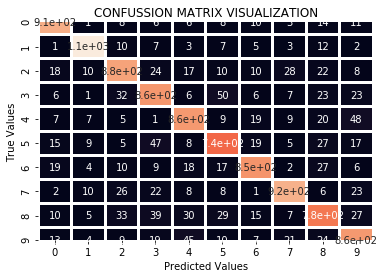

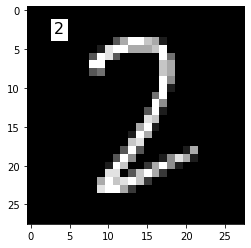

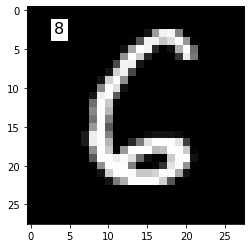

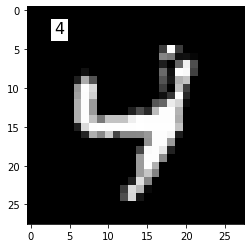

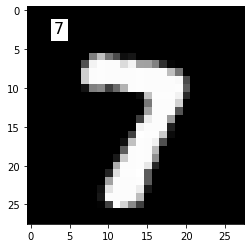

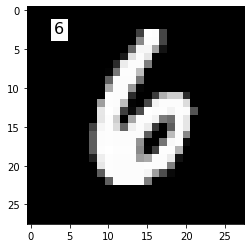

In [16]:
# --- Evaluation ------------------------------------------------------------------------------------------------------
print("\n[INFO] Evaluating...")
preditTime = time.time()
predictions = model.predict(testData)
predictions2 = model.predict_proba(testData)
print("Time used (seconds):", datetime.timedelta(seconds=time.time() - preditTime))

# show a final classification report demonstrating the accuracy of the classifier
# for each of the digits
print("\n--- EVALUATION ON TESTING DATA ---")
print("Classification Report:")
print(classification_report(testLabels, predictions))
print("\nConfusion Matrix:")
print(confusion_matrix(testLabels, predictions))
sns.heatmap(confusion_matrix(testLabels, predictions), annot=True, lw=2, cbar=False)
plt.ylabel("True Values")
plt.xlabel("Predicted Values")
plt.title("CONFUSSION MATRIX VISUALIZATION")
plt.show()
print("\nZero One Loss:", zero_one_loss(testLabels, predictions, normalize=False))
print("\nHamming Loss:", hamming_loss(testLabels, predictions))
print("\nJaccard Score:", jaccard_score(testLabels, predictions, average=None))
print("\nMultiLabel Confusion Matrix:")
print(multilabel_confusion_matrix(testLabels, predictions))
# print("\nAverage Precision Score:", average_precision_score(testLabels, predictions2))
print("\nLog Loss:", log_loss(testLabels, predictions2))
# print("\nRoc Auc Score:", roc_auc_score(testLabels, predictions2))
# print("\nCoverage Error:", coverage_error(testLabels, predictions2))

print()
# loop over a few random digits
for i in np.random.randint(0, high=len(testLabels), size=(5,)):
    # grab the image and classify it
    image = testData[i]
    prediction = model.predict([image])[0]
    # show the prediction
    imgData = np.array(image, dtype='float')
    pixels = imgData.reshape((28, 28))
    plt.imshow(pixels, cmap='gray')
    plt.annotate(prediction, (3, 3), bbox={'facecolor': 'white'}, fontsize=16)
    print("I think tha digit is : {}".format(prediction))
    plt.show()
    cv2.waitKey(0)

# Show total time program execution.
print("\n\n\nTotal Time Taken:", datetime.timedelta(seconds=time.time() - startTime))
